In [1]:
import pandas as pd
import numpy as np

# Loading the Dataset

In [2]:
path = 'AM_MAsterData.csv'

# Univariate Analysis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Univariate Analysis
def univariate_analysis(file_path: str):
    """
    Load the dataset and perform univariate exploratory data analysis
    
    Parameters:
    file_path (str): Path to the CSV file containing the dataset
    
    Returns:
    pandas.DataFrame: Loaded dataset
    """
    # Load the dataset
    df = pd.read_csv(file_path)
    print(df.columns)
    df.drop(['Author/Paper'], inplace = True, axis=1)
    
    # Basic statistical summary
    print("Basic Statistical Summary:")
    print(df.describe())
    
    # Create a figure with subplots for histograms and box plots
    features = ['Powder Material', 'Substrate Material', 'Spot Size (mm)', 
                'Power (W)', 'Mass Flowrate (g/min)', 'Travel Velocity (mm/min)', 
                'Height (mm)', 'Width (mm)', 'Contact Angle (deg)', 'Aspect Ratio (H/W)']
    
    # Separate numerical and categorical features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = df.select_dtypes(include=['object']).columns
    
    # Histogram and Box Plot for Numerical Features
    num_features = len(numerical_features)
    cols = 2  # Number of columns in the subplot grid
    rows = math.ceil(num_features / cols)
    
    plt.figure(figsize=(20, 5 * rows))
    
    #Histograms
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(rows * 2, cols, i)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        
        # Box Plots
        plt.subplot(rows * 2, cols, i + num_features)
        sns.boxplot(x=df[feature])
        plt.title(f'Box Plot of {feature}')
        plt.xlabel(feature)
    
    plt.tight_layout()
    plt.show()
    
    # Count Plot for Categorical Features
    if len(categorical_features) > 0:
        plt.figure(figsize=(15, 5))
        for i, feature in enumerate(categorical_features, 1):
            plt.subplot(1, len(categorical_features), i)
            sns.countplot(y=df[feature])
            plt.title(f'Count Plot of {feature}')
            plt.xlabel('Count')
            plt.ylabel(feature)
        
        plt.tight_layout()
        plt.show()
    
    # Distribution of Target Variable
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Aspect Ratio (H/W)'], kde=True)
    plt.title('Distribution of Aspect Ratio')
    plt.xlabel('Aspect Ratio (H/W)')
    plt.ylabel('Frequency')
    plt.show()
    
    # Correlation Heatmap for Numerical Features
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.show()
    
    return df

Index(['Author/Paper', 'Powder Material', 'Substrate Material',
       'Spot Size (mm)', 'Power (W)', 'Mass Flowrate (g/min)',
       'Travel Velocity (mm/min)', 'Height (mm)', 'Width (mm)',
       'Contact Angle (deg)', 'Aspect Ratio (H/W)'],
      dtype='object')
Basic Statistical Summary:
       Spot Size (mm)    Power (W)  Mass Flowrate (g/min)  \
count      303.000000   387.000000             387.000000   
mean         1.973630   584.139535               9.967144   
std          1.397092   949.288049              10.738164   
min          0.530000   150.000000               1.500000   
25%          1.000000   198.500000               2.880000   
50%          1.000000   276.000000               5.502000   
75%          3.200000   360.000000              12.000000   
max          6.000000  5700.000000              70.000000   

       Travel Velocity (mm/min)  Height (mm)  Width (mm)  Contact Angle (deg)  \
count                387.000000   351.000000  351.000000           265.00000

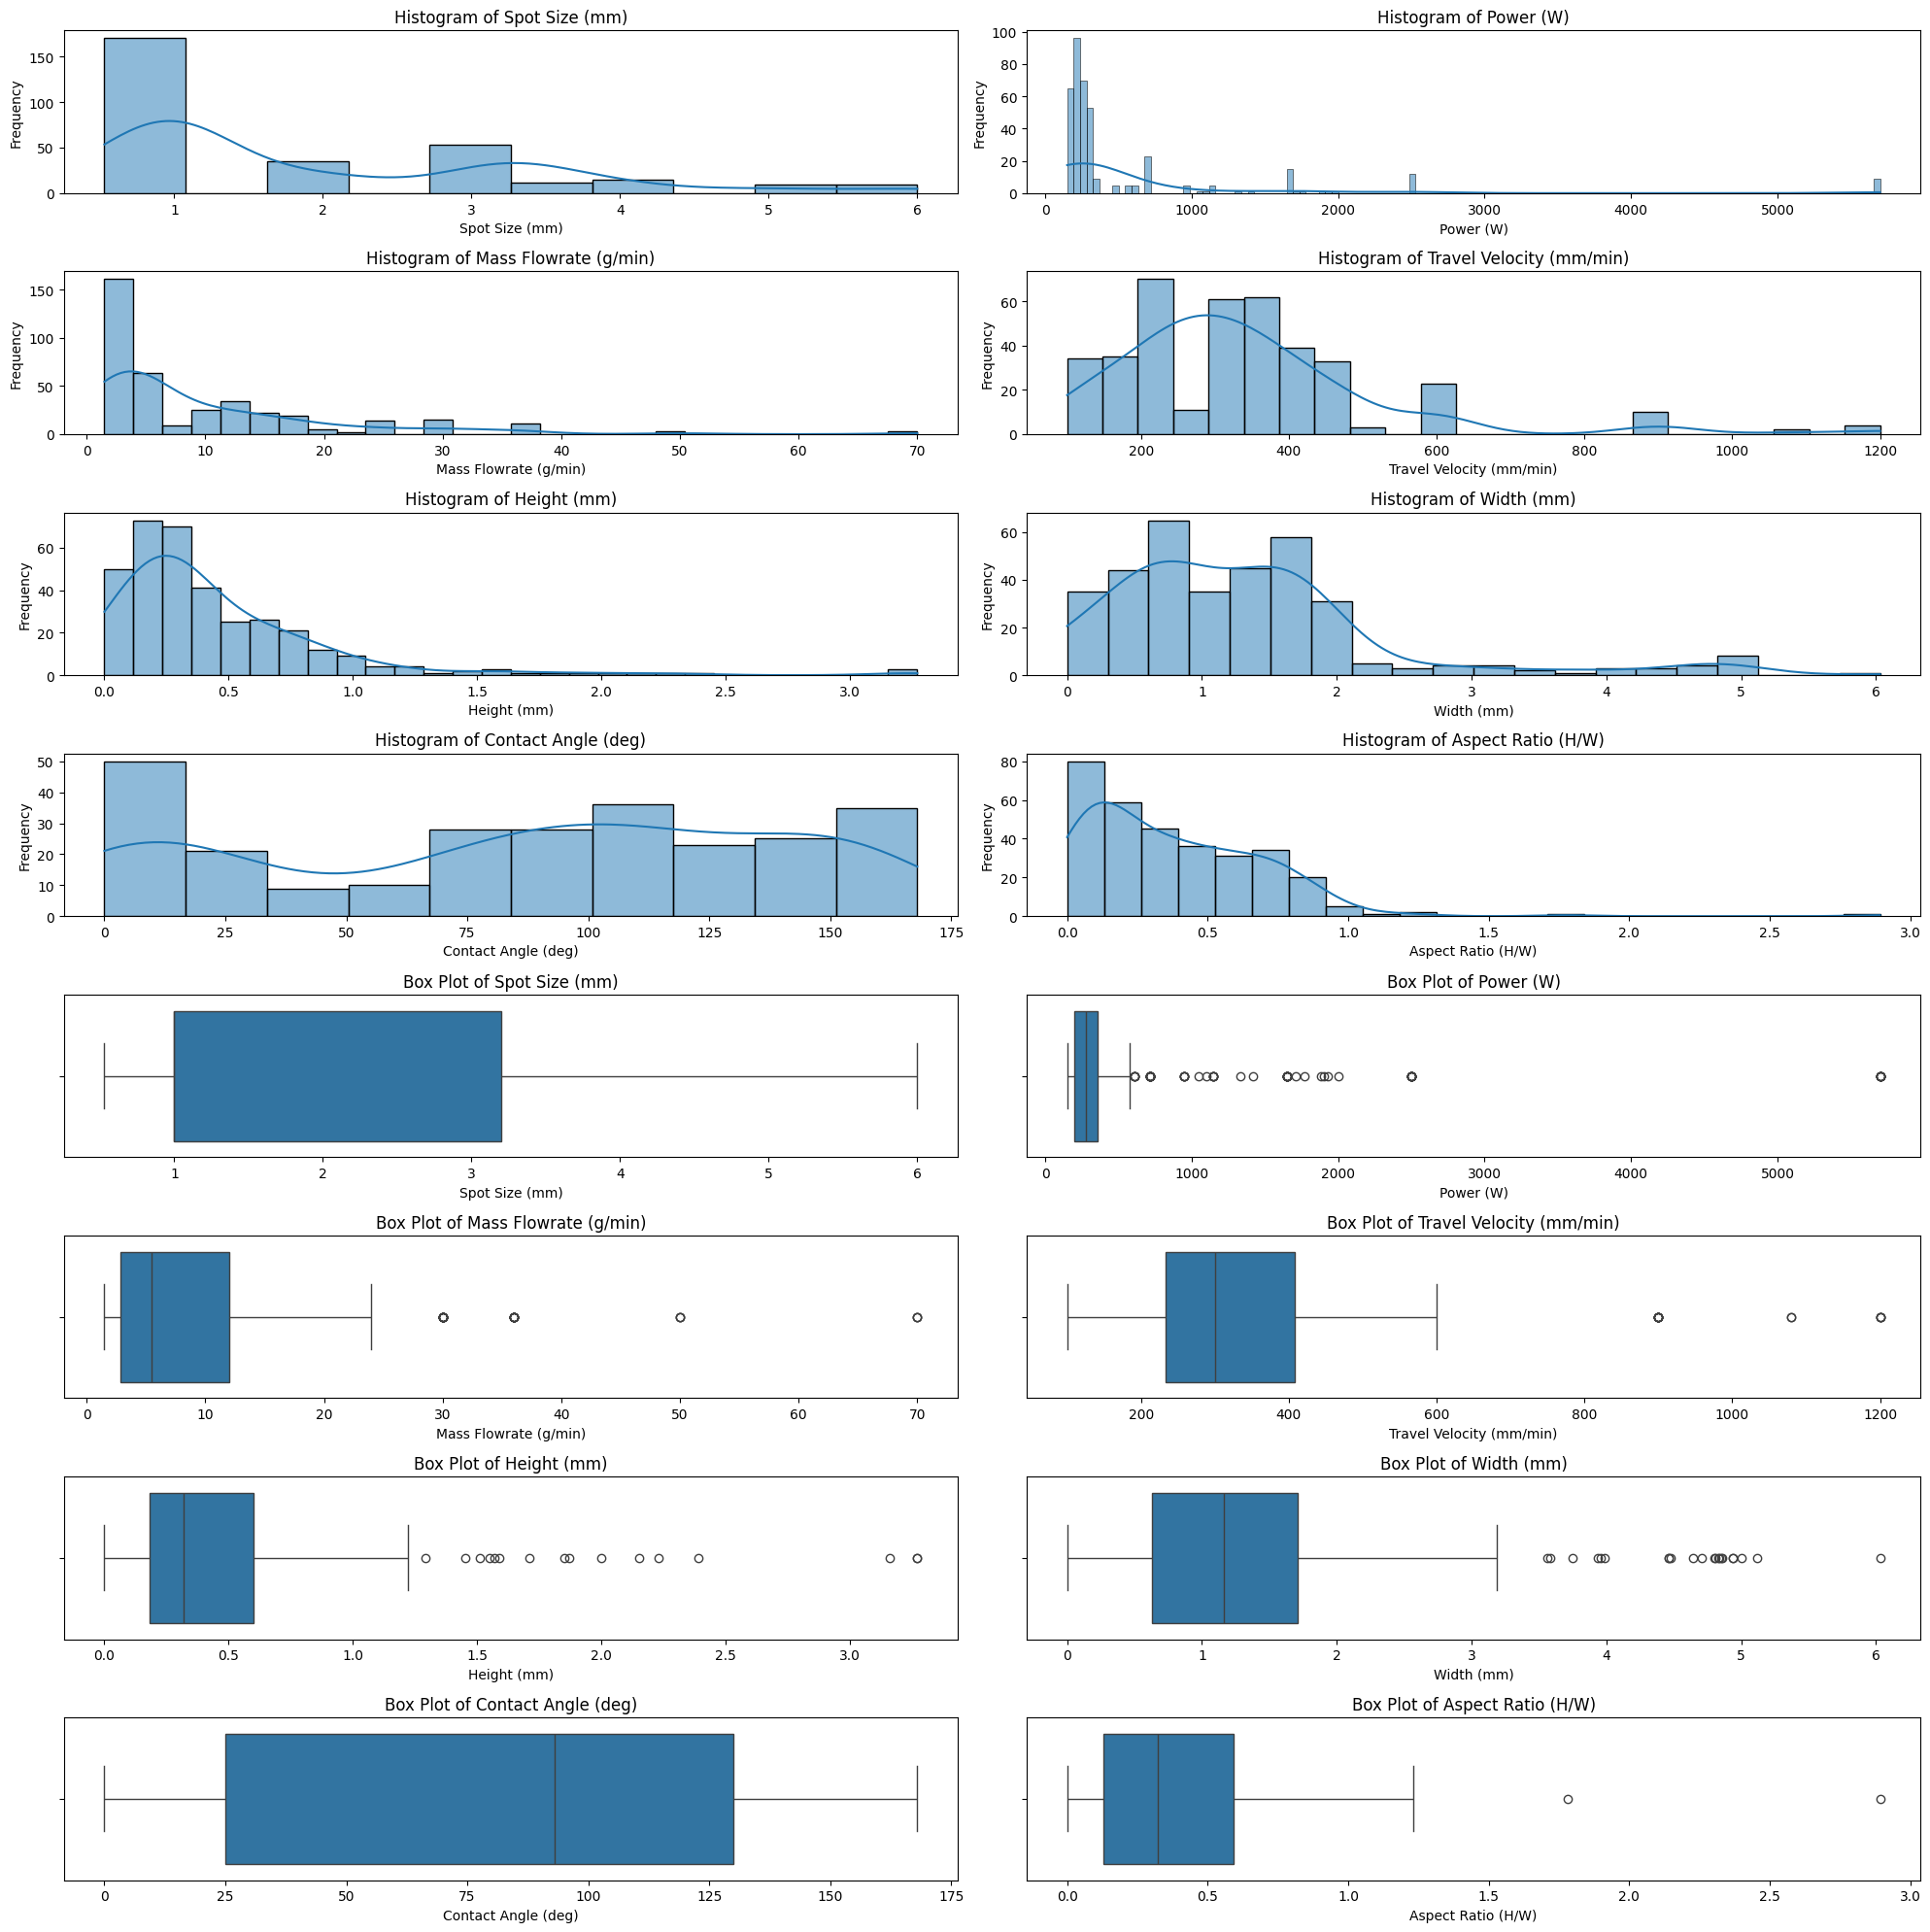

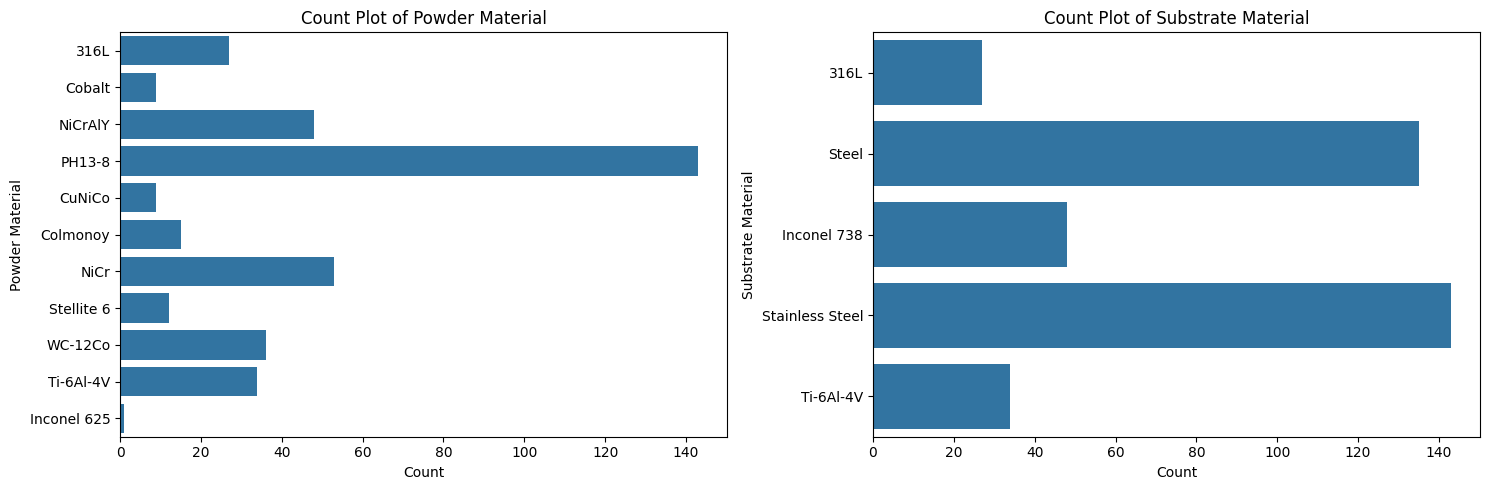

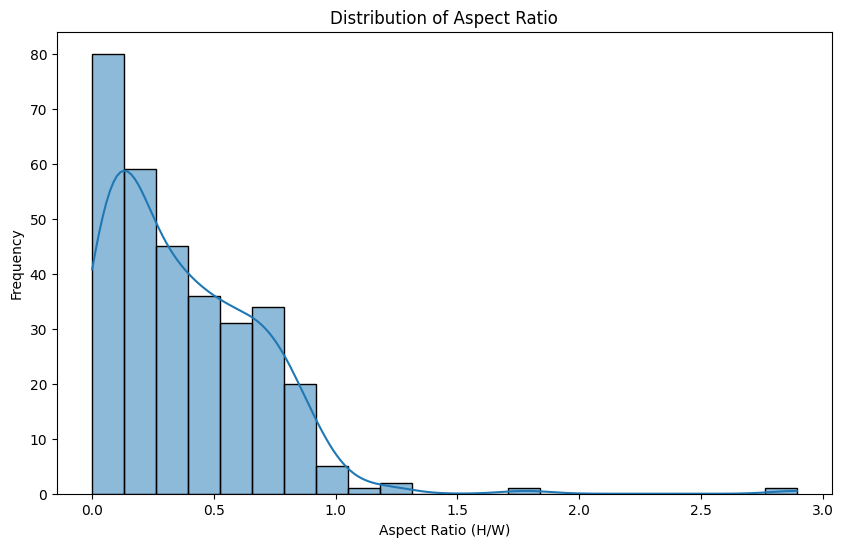

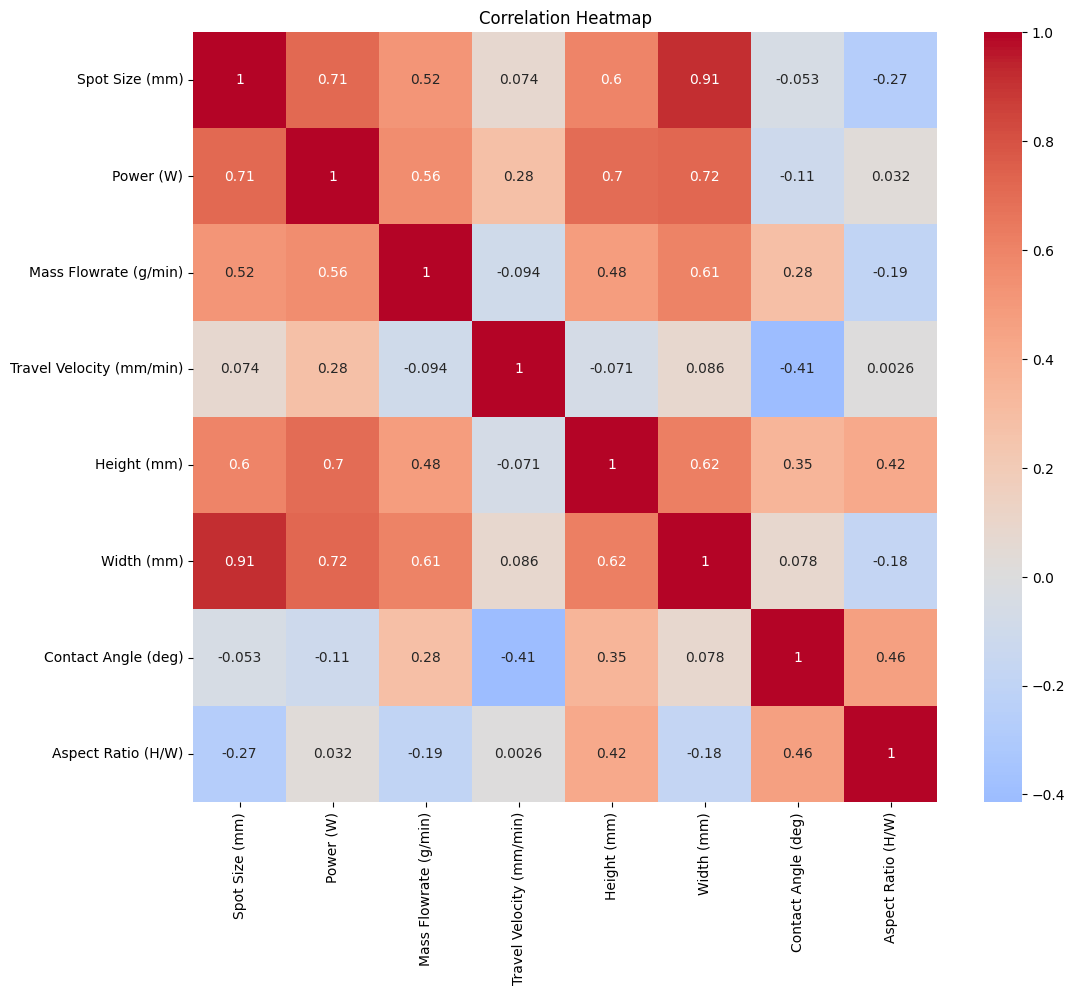

,Powder Material,Substrate Material,Spot Size (mm),Power (W),Mass Flowrate (g/min),Travel Velocity (mm/min),Height (mm),Width (mm),Contact Angle (deg),Aspect Ratio (H/W)
0,316L,316L,0.53,180,1.5000,300.0,0.470,0.56,NaN,0.839
1,316L,316L,0.53,180,1.5000,600.0,0.190,0.50,NaN,0.380
2,316L,316L,0.53,180,1.5000,900.0,0.150,0.43,NaN,0.349
3,316L,316L,0.53,180,3.0000,300.0,0.730,0.41,NaN,1.780
4,316L,316L,0.53,180,3.0000,600.0,0.390,0.38,NaN,1.026
...,...,...,...,...,...,...,...,...,...,...
382,Ti-6Al-4V,Ti-6Al-4V,2.00,300,30.0000,240.0,NaN,1.69,129.98,NaN
383,Ti-6Al-4V,Ti-6Al-4V,2.00,300,36.0000,120.0,0.810,1.89,130.94,0.429
384,Ti-6Al-4V,Ti-6Al-4V,2.00,300,36.0000,180.0,0.520,1.89,129.03,0.275
385,Ti-6Al-4V,Ti-6Al-4V,2.00,300,36.0000,240.0,0.200,1.60,125.10,0.125


In [11]:
univariate_analysis(path)

## Interpretations from Univariate Analysis

### Histrograms:
1 - Spot size, Power, Mass FlowRate, Travel Velocity, Height, Width are positively skewed

2 - Contact angle has fixed range, so we don't have to worry about the distribution

3 - The distribution for Aspect Ratio is also positively skewed. According to the industry, it might be expected to have aspect ratio less for the part to be stable.

4 - As the data is positively skewed, we can use a `box-cox` or `Log` Transformation on the data.
    (If the data is negatively skewed, we can use `Yeo-Johnson` Transformation)

### Box Plots

1 - Except for 'Spot size', other thave the outliers. In additive manufacturing, these outliers are meant to be there i.e. these are `intentional outliers` and so it won't be a good idea to eliminate them

### Count Plots

1 - Powder Material : We have more values for `PH 13-8` material as compared to others. This might be highly used material in the additive manufacturing industry.

2 - Substrate Material : Similarly for substrate material, we have `Steel` and `Stainless Steel` as highly used materials.

### HeatMap
Looks like the significant features are `Spot size`, `Height`, `Contact Angle`, `Width`,`Mass FlowRate`

But, we will analyze more in `Feature Selection` step